In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 
import random
import xgboost as xgb
from sklearn import preprocessing
from math import sqrt
train = pd.read_csv("LengthOfStay.csv")

In [2]:
train.nunique()

eid                           100000
vdate                            367
rcount                             6
gender                             2
dialysisrenalendstage              2
asthma                             2
irondef                            2
pneum                              2
substancedependence                2
psychologicaldisordermajor         2
depress                            2
psychother                         2
fibrosisandother                   2
malnutrition                       2
hemo                               2
hematocrit                       362
neutrophils                      656
sodium                         99948
glucose                        99998
bloodureanitro                   261
creatinine                     99994
bmi                            99994
pulse                            100
respiration                      160
secondarydiagnosisnonicd9         11
discharged                       378
facid                              5
l

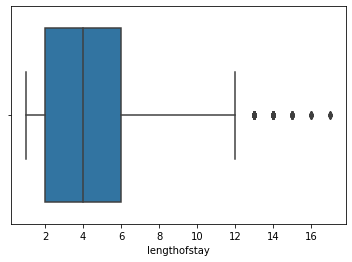

In [3]:
sns.boxplot(x=train['lengthofstay'])

In [4]:
train.lengthofstay.max()

17

In [5]:
train.lengthofstay.min()

1

In [6]:
train.lengthofstay.mean()

4.00103

In [7]:
train.isnull().sum()/train.shape[0]*100

eid                           0.0
vdate                         0.0
rcount                        0.0
gender                        0.0
dialysisrenalendstage         0.0
asthma                        0.0
irondef                       0.0
pneum                         0.0
substancedependence           0.0
psychologicaldisordermajor    0.0
depress                       0.0
psychother                    0.0
fibrosisandother              0.0
malnutrition                  0.0
hemo                          0.0
hematocrit                    0.0
neutrophils                   0.0
sodium                        0.0
glucose                       0.0
bloodureanitro                0.0
creatinine                    0.0
bmi                           0.0
pulse                         0.0
respiration                   0.0
secondarydiagnosisnonicd9     0.0
discharged                    0.0
facid                         0.0
lengthofstay                  0.0
dtype: float64

In [8]:
train.head(15)

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4
5,6,11/27/2012,3,M,0,0,0,0,0,0,...,120.265259,11.0,0.884663,27.875940,83,6.1,1,12/3/2012,B,6
6,7,9/27/2012,4,F,0,0,0,0,0,0,...,124.335692,6.0,0.923083,29.928817,68,6.5,4,10/3/2012,A,6
7,8,6/4/2012,0,F,0,0,0,0,0,1,...,152.265862,11.0,0.768106,32.999171,63,6.0,3,6/7/2012,E,3
8,9,7/5/2012,0,F,0,0,0,0,1,0,...,100.283199,12.0,1.178786,28.802682,69,6.5,1,7/8/2012,E,3
9,10,9/1/2012,0,F,0,0,0,0,0,0,...,167.066115,10.0,1.585072,32.503727,65,6.5,0,9/3/2012,E,2


In [9]:
train.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [10]:
train.drop(["eid"], axis=1, inplace=True)

In [11]:
cat_col=["rcount", "gender", "facid"]
for var in cat_col:
    lb = preprocessing.LabelEncoder()
    full_var_data = train[var].astype('str')
    lb.fit(full_var_data)
    train[var] = lb.transform(train[var].astype('str'))

In [13]:
train.drop(["vdate"], axis=1, inplace=True)
train.drop(["discharged"], axis=1, inplace=True)

In [15]:
train.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   rcount                      100000 non-null  int32  
 1   gender                      100000 non-null  int32  
 2   dialysisrenalendstage       100000 non-null  int64  
 3   asthma                      100000 non-null  int64  
 4   irondef                     100000 non-null  int64  
 5   pneum                       100000 non-null  int64  
 6   substancedependence         100000 non-null  int64  
 7   psychologicaldisordermajor  100000 non-null  int64  
 8   depress                     100000 non-null  int64  
 9   psychother                  100000 non-null  int64  
 10  fibrosisandother            100000 non-null  int64  
 11  malnutrition                100000 non-null  int64  
 12  hemo                        100000 non-null  int64  
 13  hematocrit     